PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

# Práctica 1

## Introducción

Esta es la primera práctica del segundo laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos junto a las librerías necesarias: 

In [1]:
#Importar librerías
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
from matplotlib.cbook import boxplot_stats # estadísticas Matplotlib
from math import sqrt # calcular la raíz cuadrada de un número
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from prettytable import PrettyTable
import random


#Importamos la base de datos
data = pd.read_csv('olimpiadas.csv',sep=',')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Gracias a la función data.info(), se observa que se está trabajando con un total de 271116 observaciones, mientras que con data.head() se visualiza la forma que tiene la base de datos y las primeras filas de esta. 

Según se ha estudiado, destacamos dos métodos para afrontar un proyecto, KDD (Knowledge Discovery in Databases) y CRIPS-DM (Cross-Industry Standard Process for Data Mining). En este caso, para enfrentarlo, se utilizará CRISP-DM, ya que consiste en un método no acádemico, y se considera que es el más apropiado para esta práctica. 

Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

-Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

-Comprensión de los datos: recopilación inicial, descripción y exploración de datos.

-Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

-Modelado: aplicar las técnicas de minería de datos a los dataset.

-Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

-Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action.

## Comprensión de los negocios y definición del problema

Se quiere crear un modelo que permita saber si un atleta español va a tener medalla de oro, plata o bronce
en los juegos olímpicos de Tokio que se celebrarán en 2020. Para ello, tendremos en cuenta el lugar que
ocupan en un espacio n-dimensional donde n es el número de características de cada atleta.
Para ello usaremos el dataset “Juegos olímpicos” que se encuentra en Moodle. Elige el clasificador que más se
adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las
siguientes cuestiones.


1) Haz todo el preprocesamiento para crear un set de entrenamiento y otro de validación qué permita
clasificar atletas qué tengan sólo las características necesarias. Aparte de los totalmente necesarios,
usaremos como atributos: Sexo, Edad, Altura y Peso. Explica qué has hecho y porqué. 


2) Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde
al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir
la cercanía de esa nueva instancia con el resto.


3) Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las
mejores. 


4) Utiliza el clasificador para saber que medalla es más probable que ganen Bruno Hortelano (Athletycs),
Carolina Marín (Badminton) o la selección femenina de baloncesto (Basketball).



## Comprensión de los datos

### Ejercicio 1

Según se ha visto anteriormente, la base de datos consta de 271116 observaciones, y 15 atributos, pero no deseamos trabajar con todos, ya que seguramente encontremos datos que no aportan información nueva, y supongan un coste computacional innecesario. Para ello se procede a definir cada uno para así ver cuáles son los esenciales:
- ID: identificación del atleta
- Name: nombre del atleta
- Sex: sexo del atleta
- Age: edad del atleta 
- Height: altura del atleta
- Weight: peso del atleta
- NOC: National Olympic Committee (Comité Olímpico Nacional) 
- Games: el nombre de los Juegos Olímpicos en los que el atleta participó
- Year: es el año en el que se celebraron los Juegos Olímpicos en los que el atleta participó
- Season: indica si los Juegos Olímpicos se celebraron en verano o en invierno.
- City: es el nombre de la ciudad en la que se celebraron los Juegos Olímpicos en los que el atleta participó.
- Sport: es el deporte en el que participó el atleta.
- Event: es el nombre específico del evento en el que participó el atleta
- Medal: indica la medalla que ganó el atleta en el evento en el que participó.


## Preparación de los datos

Primero se va a proceder a seleccionar aquellos atributos que sí que son necesarios. Según criterio, eliminaremos los siguientes: 
- ID: Debido a la existencia de otro atributo llamado 'Name'. La elección de eliminar este procede de que en el último apartado de la práctica, se facilitan una serie de nombres, y se deberá predecir la obtención o no de medalla. 
- Year: Es un atributo irrelevante, ya que en 'Games', se recolecta información acerca de la estación del año en la que se juega, y el año, por lo que de esta manera ahorramos coste computacional. 
- Season: De la misma manera, 'Games' ya aporta información sobre la estación en la que participa el atleta. 
- City: Con saber el año y la estación en la que se jugó, se puede saber la ciudad, por lo que estos datos no aportan información útil y supone un coste computacional adicional. 


A continuación, creamos una nueva base de datos llamada 'df' en la que guardaremos la información seleccionada anteriormente: 

In [2]:
df=data[['Name', 'Sex', 'Age', 'Height','Sport' ,'Weight', 'Games', 'NOC', 'Event', 'Medal']]

Estas variables han sido agregadas a la base de datos ya que suponen información útil en la clasificación del jugador. Justifiquemos el por qué de cada uno: 
- Name: En esta base de datos no hay una variable que recolecte la 'habilidad' de un jugador, por ello se le asocia el nombre, para que pueda diferenciar entre distintos jugadores en el caso de que las otras variables sean muy parecidas o incluso iguales. Puede haber dos jugadores de atletismo exactamente iguales, misma edad, peso, altura, género, sin embargo, la habilidad o las horas de entrenamiento de cada uno, no se registra. Es ahí donde el modelo deberá aprender que si por ejemplo encontramos un individuo llamado A, y otro igual llamado B, deberá encontrar algo que les diferencie y justifique que siempre gana A, y eso es el nombre, ya que la habilidad y la técnica de A, es lo que le diferencia y le hace ganar la medalla de oro. 
- Sex: Esencial para clasificar, ya que biológicamente, las habilidades de una mujer y un hombre fisiológicamente, no son iguales. 
- Age: La edad puede deducir los años de entrenamiento, no es lo mismo los años de entrenamiento de un jugador de 30 años, que de 14.
- Height: La altura es esencial en algunos deportes como el baloncesto. 
- Weight: El peso, al igual que la altura, es indicativo. 
- Games: Para indicar en qué olimpiadas se juegan, así de esta manera también se podrá tener conciencia de los contrincantes. 
- NOC: Para saber para qué país debuta, ya que puede ser que un país destaque en algún deporte. 
- Event: Para ver la clasificación del deporte que juega. 
- Medal: La variable objetivo. 

Para el correcto tratamiento de los datos, debemos observar la cantidad de NaN's que incluye cada variable seleccionada. Para ello: 

In [3]:
NameNaN = df['Name'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Name es:{NameNaN}")
SexNaN = df['Sex'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Sex es:{SexNaN}")
AgeNaN = df['Age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Age es:{AgeNaN}")
HeightNaN = df['Height'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Height es:{HeightNaN}")
WeightNaN = df['Weight'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Weight es:{WeightNaN}")
GamesNaN = df['Games'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Games es:{GamesNaN}")
NOCNaN = df['NOC'].isna().sum()
print(f"La cantidad de NaN que existen en la variable NOC es:{NOCNaN}")
EventNaN = df['Event'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Event es:{EventNaN}")
MedalNaN = df['Medal'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Medal es:{MedalNaN}")

La cantidad de NaN que existen en la variable Name es:0
La cantidad de NaN que existen en la variable Sex es:0
La cantidad de NaN que existen en la variable Age es:9474
La cantidad de NaN que existen en la variable Height es:60171
La cantidad de NaN que existen en la variable Weight es:62875
La cantidad de NaN que existen en la variable Games es:0
La cantidad de NaN que existen en la variable NOC es:0
La cantidad de NaN que existen en la variable Event es:0
La cantidad de NaN que existen en la variable Medal es:231333


Se observa una gran cantidad de NaN's en las variables que indican la edad, la altura, el peso y la medalla ganada en cuestión.  
Observemos cada uno en detalle para decidir qué hacer con cada atributo: 
- Age: Es información relevante, y como se está evitando eliminar registros, se rellena con la media de las edades. 
- Height: De la misma manera que se ha hecho con la edad, se rellena con la media de las alturas.
- Weight: Igual que anteriormente, se rellena con la media de los pesos. 
- Medal: Es normal encontrar NaN, ya que esto indica todos aquellos atletas que no han obtenido una medalla, por lo que se rellena con 'NpMedal' para evitar futuros problemas. 


Procedemos a ejecutar lo que se acaba de explicar: 

In [4]:
# Calcula la media de la columna 'Age'
mediaA = df['Age'].mean()
# Rellena los valores NaN con la media
df['Age'].fillna(mediaA, inplace=True) 
# Calcula la media de la columna 'Height'
mediaH = df['Height'].mean()
# Rellena los valores NaN con la media
df['Height'].fillna(mediaH, inplace=True) 
# Calcula la media de la columna 'Height'
mediaW = df['Weight'].mean()
# Rellena los valores NaN con la media
df['Weight'].fillna(mediaW, inplace=True) 
# Rellena los valores NaN con 'NoMedal'
df['Medal'].fillna('NpMedal', inplace=True) 

<ipython-input-4-0cf37b900bc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(mediaA, inplace=True)
<ipython-input-4-0cf37b900bc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'].fillna(mediaH, inplace=True)
<ipython-input-4-0cf37b900bc3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'].fillna(mediaW, inplace=True)
<ipython-input-4-0cf37b900bc3>:14: SettingWithCopyWarning: 
A value is tryi

Comprobemos por tanto que la suma de los NaN de los atributos: edad, peso y altura es 0, es decir, se ha rellenado de manera correcta: 

In [5]:
df['Height'].isnull().sum() + df['Age'].isnull().sum() + df['Weight'].isnull().sum()

0

Efectivamente, la suma total de los NaN de esos tres atributos es 0, por lo que procedemos con lo siguiente. 

Representamos mediante un boxplot las variables: Edad, Peso y Altura para así observar cuáles son los máximos y mínimos, y observar cómo se distribuye.

Comenzamos con la variable 'Age'.

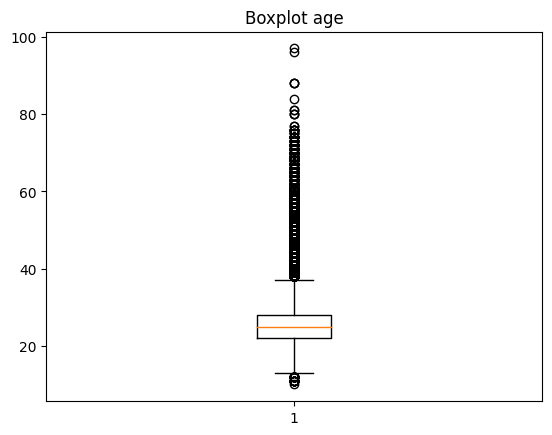

In [6]:
boxplot_age=df['Age']
plt.boxplot(boxplot_age)
plt.title('Boxplot age')
plt.show()

Observamos máximos, mínimos y outliers.

In [7]:
stats = boxplot_stats(boxplot_age)
stats = stats[0] 
outliers = stats['fliers']
minAge = stats['q1']-1.5*stats['iqr']
maxAge = stats['q3']+1.5*stats['iqr']
print(minAge, maxAge, len(outliers))

13.0 37.0 11981


Vemos como la edad mínima de un participante es de 13 años, mientras que el máximo aceptado es 37. El mínimo  parece un poco precipitado, ya que los participantes deberán de tener mínimo 14 años para la calificación, y participarán en la sección de 'Juventud'. Mientras que la edad máxima no está definida, por lo que ese máximo podría ser entendible. 

Observemos cuál es la edad mínima registrada: 

In [8]:
min_age = df['Age'].min()
min_age

10.0

No es un valor razonable, por lo que haremos una selección, tomando aquellos cuya edad sea estrictamente mayor que 13. 

In [9]:
df = df[df['Age'] >= 14]

Comprobemos si se ha realizado correctamente, para ello volveremos a imprimir el menor valor de la variable. 

In [10]:
min_age = df['Age'].min()
min_age

14.0

Se ha ejecutado correctamente por lo que continuamos con las siguientes variables. 
Graficamos 'Weight': 

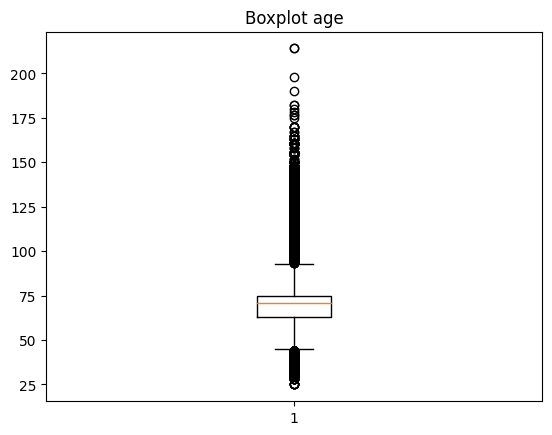

In [11]:
boxplot_weight=df['Weight']
plt.boxplot(boxplot_weight)
plt.title('Boxplot age')
plt.show()

Observamos máximos, mínimos y outliers.

In [12]:
stats = boxplot_stats(boxplot_weight)
stats = stats[0] 
outliers = stats['fliers']
minWeight = stats['q1']-1.5*stats['iqr']
maxWeight = stats['q3']+1.5*stats['iqr']
print(minWeight, maxWeight, len(outliers))

45.0 93.0 15530


Tanto el peso mínimo como el máximo parecen razonables, ya que hay deportes que implican más masa muscular, por lo que está dentro de lo entendible. 

Graficamos la variable 'Height'.

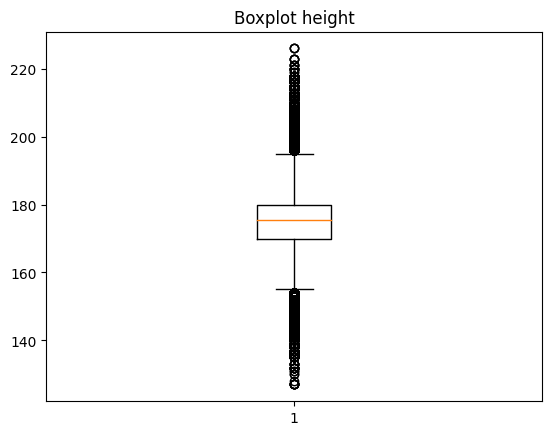

In [13]:
import matplotlib.pyplot as plt
boxplot_height=df['Height']
plt.boxplot(boxplot_height)
plt.title('Boxplot height')
plt.show()

Observemos los máximos, mínimos y outliers.

In [14]:
stats = boxplot_stats(boxplot_height)
stats = stats[0] 
outliers = stats['fliers']
minHeight = stats['q1']-1.5*stats['iqr']
maxHeight = stats['q3']+1.5*stats['iqr']
print(minHeight, maxHeight, len(outliers))

155.0 195.0 10499


De la misma manera, entendemos que hay deportes que no requieren una altura elevada, como puede ser la natación, sin embargo hay otros como el baloncesto que la altura tiende a ser elevada, por lo que se encuentran dentro de un rango razonable. 

El set de entrenamiento y de validación se irá creando en cada modelo correspondiente de la siguiente manera: 

In [15]:
dataPruebaX=df[['Name', 'Sex', 'Age', 'Sport', 'Games', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(dataPruebaX, dataPruebaY, test_size=0.2, random_state=42)


Esto es porque se realizarán diversos modelos, y dependiendo de cual, se necesitarán unas variables u otras.

## Modelado

### Ejercicio 2 y 3
- Ejercicio 2: Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. 
- Ejercicio 3: Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la clasificación. Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las mejores.


La implementación de ambos ejercicios se realiza conjuntamente ya que a la vez que se prueban distintas configuraciones para las dos métricas principales, se dibuja una tabla en la que se van representando ambas configuraciones bajo un criterio. 

Para satisfacer el objetivo, se procede a realizar un doble bucle en la que se trabaja con 3 distintos valores en cada métrica, y se implementan unos con otros, para así bajo un criterio de precisión y error cuadrático medio, seleccionar aquellas métricas que optimicen dichos criterios. 

Los valores que se van a usar son:  
- Número de individuos para clasificar nueva instancia: [3, 5, 7]
- Distancias para calcular las cercanías de la nueva instancia: [ euclidean, manhattan, minkowski ]

En esta primera implementación, se va a hacer uso de la división del conjunto de datos en entrenamiento y prueba, para evaluar la capacidad de generalización del modelo. 

Para evaluarlo correctamente, se hará uso de la función 'predict', que guardará en una variable la clasifcación realizada, para así compararlo con el original, y calcular como se ha explicado anteriormente los criterios para decidir si esas métricas son útiles. 

Los valores de los criterios se irán añadiendo en una tabla que más tarde se imprimirá con todos los valores obtenidos. 

En cuanto al tratado de datos, aquellas variables cuyo formato sea una entrada de texto se le asignará un número comprendido en los enteros. Esto se hace gracias a la función 'LabelEncoder' una técnica de codificación que transforma las etiquetas de texto en valores numéricos para que puedan ser procesados por algoritmos. 

Gracias al bucle, detecta todas aquellas que no sean numéricas, y las codifica sobrescribiendo. 

Hace lo mismo tanto para las varaibles seleccionadas, como para la objetivo. 

Primeramente este método fue rechazado, ya que como se había visto en clase, trabajar con datos grandes en redes neuronales, podía presentar desafíos como los problemas de escalabilidad, ya que si por ejemplo en la variable 'Sport', si asignaba al deporte de Baloncesto en la codificación el 1, mientras que al Bobsleigh el 52, pues le iba a dar una gran diferencia de peso al deporte de Bobsleigh en comparación con el Baloncesto. 

Sin embargo, como en este modelo se trabaja con distancias, podría incluso ser más eficiente en tiempo de cálculo y recursos computacionales, ya que implica simplemente calcular la distancia entre puntos en un espacio dimensional.

Se procede a realizar la creación y entrenamiento del modelo. Como resultado, se obtendrá la tabla que se ha mencionado anteriormente. 

In [16]:
dataPruebaX=df[['Name', 'Sex', 'Age', 'Sport', 'Games', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]

le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(dataPruebaX, dataPruebaY, test_size=0.2, random_state=42)

# Definir distintas configuraciones de k y distancia
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

#Creación de tabla
table = PrettyTable()
table.field_names = ["k", "metric", "accuracy", "error_medio"]

# Evaluar el desempeño del modelo para cada configuración de k y distancia
for k in k_values:
    for metric in distance_metrics:
        # Entrenar el modelo
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        model.fit(X_train, y_train)
        
        # Realizar la predicción en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, y_pred)

        #Error medio 
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)        
        
        # Imprimir la configuración y la precisión del modelo
        table.add_row([k, metric, accuracy, rmse])
        #print('k={}, metric={}, accuracy={}, error_medio={}'.format(k, metric, accuracy, rmse))

print(table)

<ipython-input-16-d6a467441175>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-16-d6a467441175>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-16-d6a467441175>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

+---+-----------+--------------------+--------------------+
| k |   metric  |      accuracy      |    error_medio     |
+---+-----------+--------------------+--------------------+
| 3 | euclidean | 0.8123523331364442 | 0.6862554514139708 |
| 3 | manhattan | 0.8129245422327229 | 0.6873976323938521 |
| 3 | minkowski | 0.8123523331364442 | 0.6862554514139708 |
| 5 | euclidean | 0.8366619905493208 | 0.6024812104772607 |
| 5 | manhattan | 0.8379171588895452 | 0.6018221494648837 |
| 5 | minkowski | 0.8366619905493208 | 0.6024812104772607 |
| 7 | euclidean | 0.846961754282339  | 0.5711196400377575 |
| 7 | manhattan | 0.8472386296515062 | 0.5709741833177375 |
| 7 | minkowski | 0.846961754282339  | 0.5711196400377575 |
+---+-----------+--------------------+--------------------+


Si observamos los resultados, figuramos que son bastante buenos en este caso. Sin embargo, si los comparamos, nos fijamos en que es indiferente usar la distancia 'Euclidean' o 'Minkowski' ya que obtienen los mismos valores en términos de precisión y error medio cuadrático.

Observemos en detalle cada una y busquemos posibles justificaciones:

- Euclidean: 

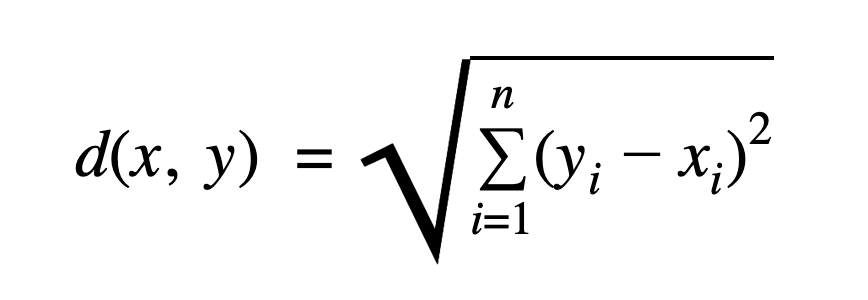

- Minkoswki: 

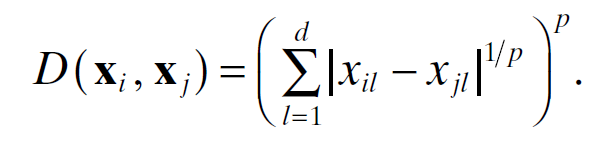


Como se puede ver, ambas fórmulas son idénticas, con la única diferencia de que en la distancia Euclidiana el valor de "p" está implícitamente fijado en 2, mientras que en la distancia Minkowski con "p" igual a 2 se especifica explícitamente. Por lo tanto, en la práctica, la distancia Euclidiana y la distancia Minkowski con "p" igual a 2 darán resultados idénticos cuando se utilicen en la misma situación.

Observando la tabla obtenida, vemos que las métricas más óptimas son k=7, y distancia Euclídea o Minkowski. 

Pero analizando posibles errores de este método, observamos que el entrenamiento obtendrá unos valores de precisión dependiendo del órden en el que se encuentren los datos. Veamos esto en detalle: 

Pongamos el ejemplo de la variable que recoge el año y la temporada (Games), por ejemplo: 1998 Winter. Ahora bien, pongamos que el primer usario registrado en la base de datos, jugó 'Bobsleigh' en la categoría de 'Men's Four' y no obtuvo medalla. Sin embargo, en las próximas olimpiadas, las del 2002, vuelve a participar, y obtiene la medalla de oro. El problema está en que si la segunda participación se recoge en la base de datos más tarde, implica que cuando se codifica, los juegos de 1998 Winter obtienen un valor de 1, mientras que 2002 Winter, obtienen el valor de 18 (por poner un ejemplo). Encontramos una diferencia de 17 unidades, cuando en verdad, estos dos eventos aportan mucha información el uno al otro, ya que muchos individuos que participaron en la primera, vuelven a participar en la segunda. Es por eso que el modelo, tiene que aprender que aunque estén distantes, esos dos eventos, están correlacionados. 

Es decir, según en qué orden se encuentren los datos, puede que dos eventos que estén correlacionados obtengan una distancia amplia de diferencia, lo que condiciona al modelo.

Como no se sabe exactamente qué pesos aumenta o disminuye, es un enigma saber si relaciona bien dichos supuestos, lo que afecta a la precisión del modelo. 

Debido a lo que se acaba de explicar, se procede a crear otro modelo pero ahora en vez de codificar para calcular las distancias, se calcularán gracias a One-Hot-Encoding. 


Encontramos un problema a la hora de realizar este modelo, y es que como tenemos gran cantidad de datos, y gran cantidad de posibles valores para las variables, se deberán seleccionar únicamente 5000 datos, y las variables: ['Sex', 'Age', 'Sport', 'Games', 'Weight', 'Height', 'Medal']. Esto es debido a que el uso de la memoria RAM es limitado, y no puede trabajar con lo deseado.

Además, las variables numéricas van a ser categorizadas en tres intervalos: 
- Edad: Jóven, Media, Mayor
- Altura: Bajo, Medio, Alto 
- Peso: Delgado, En forma, Pesado 

Esto se hace para el correcto entrenamiento del modelo, así de esta manera cuando se codifica en One - Hot - Encoding, se realizan todas por igual. 

Por lo que se hace una primera selección de 5000 individuos aleatorios (cada ejecución variará ligeramente en la precisión del modelo, ya que se ha entrenado con datos aleatorios). 


Y además, la variable nombres también ha tenido que ser eliminada, ya que aumentaba considerablemente el tamaño de la base de datos al implementar el One-Hot-Encoding.

Utilizamos los mismos valores para los k individuos vecinos, pero ahora en vez de tener las mismas distancias anteriores, eliminamos una de las dos que obtenía los mismos valores, para añadir la distancia 'hamming', ya que se define como cantidad de posiciones en las que dos vectores binarios difieren. Al haber convertido todas las variables en vectores binarios, sería útil utilizarlo.

En este modelo se hará uso de la validación cruzada para el entrenamiento, ya que permite evaluar la capacidad de generalización de un modelo de manera más robusta y confiable. 

De la misma manera que en el modelo anterior, se imprime una tabla que indique las métricas utilizadas junto a la precisión. 

Procedemos a categorizar las variables como se ha explicado anteriormente: 

In [17]:
#Categorizamos la variable Age 
corteAge = minAge
corteAge2 = maxAge
df['Age_cat'] = "Jóven"
df.loc[(df['Age'] > corteAge) & (df['Age'] <= corteAge2), 'Age_cat'] = "Media"
df.loc[df['Age'] > corteAge2, 'Age_cat'] = "Mayor"

#Categorizamos la variable Height 
corteHeight = minHeight
corteHeight2 = maxHeight
df['Height_cat'] = "Bajo"
df.loc[(df['Height'] > corteHeight) & (df['Height'] <= corteHeight2), 'Height_cat'] = "Medio"
df.loc[df['Height'] > corteHeight2, 'Height_cat'] = "Alto"

#Categorizamos la variable Weight
corteWeight = minWeight
corteWeight2 = maxWeight
df['Weight_cat'] = "Delgado"
df.loc[(df['Weight'] > corteWeight) & (df['Weight'] <= corteWeight2), 'Weight_cat'] = "EnForma"
df.loc[df['Weight'] > corteWeight2, 'Weight_cat'] = "Pesado"

Se seleccionan 5000 individuos aleatorios e irrepetibles 

In [18]:
# Obtener el número total de filas en el DataFrame
num_filas = df.shape[0]

# Generar 5000 índices aleatorios
indices_aleatorios = random.sample(range(num_filas), 5000)

# Seleccionar las filas correspondientes a los índices aleatorios
df_5000 = df.iloc[indices_aleatorios]

Comenzamos con la selección de las variables, las codificamos, y entrenamos el modelo de la misma manera que se realizó el anterior, esta vez con validación cruzada, añadiendo los valores de las métricas y la precisión a la tabla.

In [19]:
#Seleccionamos las variables con las que se va a trabajar
dataPruebaX=df_5000[['Sex', 'Age_cat', 'Sport', 'Games', 'Weight_cat', 'Height_cat']]
dataPruebaY= df_5000[['Medal']]


encoder=OneHotEncoder()
dataPruebaX=encoder.fit_transform(dataPruebaX).toarray()



X_train, X_test, y_train, y_test = train_test_split(dataPruebaX, dataPruebaY, test_size=0.3, random_state=42)


# Definir distintas configuraciones de k y distancia
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'hamming']

#Creación de tabla
table = PrettyTable()
table.field_names = ["k", "metric", "accuracy"]

# Evaluar el desempeño del modelo para cada configuración de k y distancia
for metric in distance_metrics:
  k_scores=[]
  index=0
  for k in k_values:

        # Entrenar el modelo
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        

        # validación cruzada del modelo
        scores=cross_val_score(model, dataPruebaX, dataPruebaY, cv=3, scoring='accuracy') 
        


        k_scores.append(scores.mean())
        # Realizar la predicción en el conjunto de prueba
        y_pred = cross_val_predict(model, dataPruebaX, dataPruebaY, cv=3)
        
        


        # Imprimir la configuración y la precisión del modelo
        table.add_row([k, metric, k_scores[index]])
        index=index+1


print(table)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

+---+-----------+--------------------+
| k |   metric  |      accuracy      |
+---+-----------+--------------------+
| 3 | euclidean | 0.8052000644288909 |
| 5 | euclidean | 0.8397999871814353 |
| 7 | euclidean | 0.8520001881976547 |
| 3 | manhattan | 0.8052000644288909 |
| 5 | manhattan | 0.8397999871814353 |
| 7 | manhattan | 0.8520001881976547 |
| 3 |  hamming  | 0.8042003844129133 |
| 5 |  hamming  |  0.8387998270694   |
| 7 |  hamming  | 0.8483998278375537 |
+---+-----------+--------------------+


Se puede observar que la precisión no mejora considerablemente. Esto se puede deber a la reducción de datos, y omisión de variables que se ha realizado, ya que limita al modelo en el entrenamiento. Si los recursos fuesen mayores, el entrenamiento podría mejorar, lo que supondría una mejora en la precisión de este. 

Los resultados del modelo con menos datos en el entrenamiento son prometedores y muestran una similitud considerable en la precisión con el modelo anterior con más datos. Se espera que al aumentar los recursos y, por tanto, los datos de entrenamiento, la precisión del modelo mejore significativamente debido a un mayor poder de generalización y capacidad para aprender patrones más complejos.



Veamos la matriz de confusión en la cual representa los valores reales frente a las predicciones: 

In [20]:
from sklearn.metrics import classification_report

dataPruebaX = df[['Name', 'Sex', 'Age', 'Sport', 'Games', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY = df[['Medal']]

le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX.loc[:, col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY.loc[:, col] = le.fit_transform(dataPruebaY[col])

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(dataPruebaX, dataPruebaY, test_size=0.2, random_state=42)

# Entrenar el modelo
model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
model.fit(X_train, y_train)

# Predicción del modelo para la cración de la matriz de confusión
y_pred = model.predict(X_test)

# Imprimir matriz de confusión
print(confusion_matrix(y_test, y_pred))




<ipython-input-20-07b07849ab52>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX.loc[:, col] = le.fit_transform(dataPruebaX[col])
<ipython-input-20-07b07849ab52>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataPruebaX.loc[:, col] = le.fit_transform(dataPruebaX[col])
<ipython-input-20-07b07849ab52>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

[[   73   100  2383    31]
 [   78   301  2145    52]
 [  314   504 45481   144]
 [   60   137  2328    45]]


Observando la matriz de confusión, vemos que la diagonal son todos los resultados que ha predicho correctamente. Vemos que predomina los aciertos sobre la medalla [2], pero claro, en la codificación hemos perdido el valor real de este. Busquemos a ver en la base de datos y el vector codificado el valor 2, para así obtener la fila, y ya buscar en la base de datos a qué corresponde: 

In [21]:
# Buscar el valor 3 en el vector "dataPruebaY"
index = np.where(dataPruebaY == 2)[0][0]  # Obtenemos el primer índice donde se encuentra el valor 3

# Acceder a la fila 62 en el DataFrame
fila_62 = df.iloc[62]

# Mostrar la fila 62
print(fila_62)

Name                  Kjetil Andr Aamodt
Sex                                    M
Age                                 20.0
Height                             176.0
Sport                      Alpine Skiing
Weight                              85.0
Games                        1992 Winter
NOC                                  NOR
Event         Alpine Skiing Men's Slalom
Medal                            NpMedal
Age_cat                            Media
Height_cat                         Medio
Weight_cat                       EnForma
Name: 62, dtype: object


Vemos por tanto que el primer participante con medalla [2], es en verdad no haber ganado medalla. Por ello hay tanta cantidad de aciertos, porque en esta base de datos predomina los NpMedal. 

Lo que se encuentra fuera de la diagonal, se consideran errores de predicción, que en algunos casos, se puede considerar elevado, pero teniendo en cuenta la cantidad de datos que hay, y que al final este modelo tiene una predicción del 85%, se pueden justificar. 

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.03      0.05      2587
           1       0.29      0.12      0.17      2576
           2       0.87      0.98      0.92     46443
           3       0.17      0.02      0.03      2570

    accuracy                           0.85     54176
   macro avg       0.37      0.29      0.29     54176
weighted avg       0.77      0.85      0.80     54176



Observando el reporte del clasificador, se confirma por tanto la sospecha de la cantidad de medallas NpMedal. Gran parte de la base de datos consta de esta medalla mencionada, por lo que en el entrenamiento ha "aprendido" bien sobre estas, pero no ha podido estudiar el resto debido a una falta de información. 

Esto es entendible, ya que a lo mejor en una carrera de atletismo en la que participan 12 individuos, únicamente 3 obtienen medalla, por lo que al final 9 de ellos ya se encuentran en NpMedal. Si esto lo extrapolamos al resto de deportes, de eventos, y de olimpiadas, es razonable obtener estos resultados. 

Lo podemos respaldar con la columna 'support' que vemos en el reporte, ya que este consta la cantidad de instancias en cada clase del conjunto de pruebas, se ve una clara diferencia con el resto.

Para la representación de los individuos, se hará uso del primer modelo creado, es decir el de la codificación de etiquetas categóricas en forma numérica. 


Pero encontramos un problema, y es que se están usando 9 variables en la representación, y si se quiere conseguir una correcta interpretación, no se puede hacer una representación de 9 dimensiones, por lo que recurriremos a la reducción de dimensionalidad, a PCA, ya que este transforma un conjunto de variables originales en un conjunto de nuevas variables no correlacionadas llamadas componentes principales, con el objetivo de reducir el número de dimensiones o variables en los datos, manteniendo la mayor parte de la variabilidad de los datos originales. 

De esta manera podremos hacer una representación de 3 dimensiones. 

<ipython-input-23-80825e3f1107>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-23-80825e3f1107>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-23-80825e3f1107>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

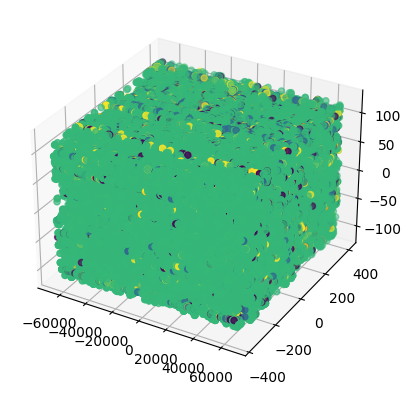

In [23]:

dataPruebaX=df[['Name', 'Sex', 'Age', 'Sport', 'Games', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]



le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

# Ejecutar PCA para reducir a tres dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(dataPruebaX)

# Crear instancia de clasificador KNN
model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")

# Entrenar modelo con datos proyectados en 3D
model.fit(X_pca, dataPruebaY)

# Graficar datos en 3D con colores según clase
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=dataPruebaY)
plt.show()

Evidentemente esto es inentendible, por ello reducimos la cantidad de datos tomando los 5000 individuos seleccionados anteriormente de manera aleatoria, y repetimos lo que se ha ejecutado anteriormente. 

<ipython-input-24-4cfa4ee0d4dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-24-4cfa4ee0d4dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-24-4cfa4ee0d4dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

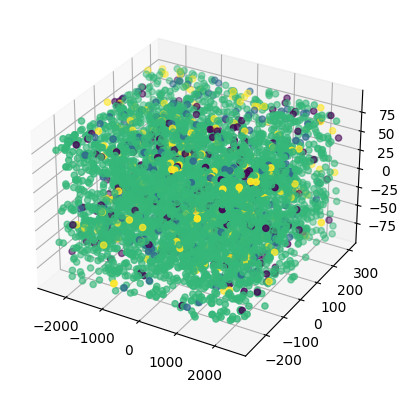

In [24]:
dataPruebaX=df_5000[['Name', 'Sex', 'Age', 'Sport', 'Games', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df_5000[['Medal']]


le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

# Ejecutar PCA para reducir a tres dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(dataPruebaX)


# Graficar datos en 3D con colores según clase
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=dataPruebaY)
plt.show()

De esta manera obtenemos un gráfico en el que se observan las distancias entre individuos. Debido a la reducción de dimensionalidad, no se aprecia qué eje representa qué variable. 

Sería interesante ver cuál ha sido el criterio de agrupación. Para ello observemos los 3 componentes principales creados, y qué peso le da a cada variable. 

Así veremos cómo ha agrupado:

In [25]:
# Obtener los coeficientes de carga de las variables en cada componente principal
coeficientes_de_carga = pca.components_

# Los coeficientes de carga se encuentran en la propiedad 'components_' del objeto PCA
# Esto devuelve una matriz de forma (n_componentes, n_variables), donde n_componentes es el número de componentes principales
# y n_variables es el número de variables originales en tus datos

# Obtener los nombres de las variables originales
nombres_variables_originales = dataPruebaX.columns

# Puedes imprimir los coeficientes de carga y los nombres de las variables originales para cada componente principal
for i, componente in enumerate(coeficientes_de_carga):
    print("Componente Principal {}: ".format(i+1))
    for j, carga in enumerate(componente):
        print("Variable {}: {}".format(nombres_variables_originales[j], carga))


Componente Principal 1: 
Variable Name: -0.9999986761254662
Variable Sex: 7.451066472994542e-06
Variable Age: 5.6373426091318665e-05
Variable Sport: -0.0001339591493552176
Variable Games: -0.0006877359588219764
Variable NOC: -0.00014994346919502144
Variable Event: -0.001455078871770022
Variable Weight: 0.00011764063621834053
Variable Height: 3.338260604830697e-06
Componente Principal 2: 
Variable Name: -0.0014651685813440673
Variable Sex: -0.00015154494632885207
Variable Age: -0.00443464146072256
Variable Sport: 0.09990083511553252
Variable Games: 0.005824485449954009
Variable NOC: 0.0007119246457700928
Variable Event: 0.9949651093451064
Variable Weight: 0.002825798520224951
Variable Height: -4.466134688847832e-05
Componente Principal 3: 
Variable Name: -0.00013872537933901538
Variable Sex: 4.707564478385884e-05
Variable Age: 0.00040184068668686545
Variable Sport: -0.00012264921401654132
Variable Games: -0.014836022027429695
Variable NOC: 0.9998893976710986
Variable Event: -0.000616251

De estos datos podemos obtenemos por tanto que componente principal se representa y en qué medida por cada variable. 





### Ejercicio 4

Utiliza el clasificador para saber que medalla es más probable que ganen Bruno Hortelano (Athletycs), Carolina Marín (Badminton) o la selección femenina de baloncesto (Basketball).

Comencemos por Bruno Hortelano. Para cada uno se creará un modelo mediante el método de codificación de etiquetas, es decir, reutilizamos los modelos anteriores ya que observábamos que no tenian especialmente mala precisión. 

Pero encontramos un problema en esta codificación, y es que si queremos añadir al atleta Bruno Hortelano, no sabemos qué número entero ha asignado al deporte de atletismo, o al 'NOC', o al evento... 

Es por eso que el atleta debe ser añadido a la base de datos antes de realizar ninguna codificación, para que se le asigne un entero como al resto. Eso sí, se debe tener cuidado de que en la creación del modelo, en el entrenamiento, no contamine la muestra, antes de proceder, se debe separar. 

Para la correcta clasificación tanto de Bruno Hortelano como de Carolina Marín, se han buscado en internet los valores de las variables necesarias, como la altura, peso, edad, etc...

Todas las clasificaciones de este ejercicio se realizarán en las olimpiadas de 2016 de verano. 

In [26]:
dataPruebaX=df[['Name', 'Sex', 'Age', 'Sport', 'Games', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]

#Bruno Hortelano
new_row_X = {'Sex':"M", 'Age': 31.0, 'Sport': "Athletycs",'Games':"2016 summer", 'NOC': "ESP", 'Event': "Athletics Men's 200 metres", 'Weight': 72.000000, 'Height': 181.00000}
dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)

le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])


#ultima filaX=dataPruebaX[ultima fila]
dataPruebaX_except_last = dataPruebaX.iloc[:-1]



ultima_fila = dataPruebaX.tail(1)


X_train, X_test, y_train, y_test = train_test_split(dataPruebaX_except_last, dataPruebaY, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
model.fit(dataPruebaX_except_last, dataPruebaY)

y_pred = model.predict(ultima_fila)
print(y_pred)

<ipython-input-26-0155e414d535>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)
<ipython-input-26-0155e414d535>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaY[col] = le.fit_transform(dataPruebaY[col])
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[2]


Vemos que lo clasifica como [2], pero claro, en la codificación se ha perdido rastro de a qué corresponde. Es por ello que en el vector codificado, se buscará al primer individuo que cuente con medalla [2], se guardará la fila, y se buscará en la base de datos que no se ha codificado para obtener la equivalencia. Para ello: 

In [27]:
# Buscar el valor 3 en el vector "dataPruebaY"
index = np.where(dataPruebaY == y_pred)[0][0]  # Obtenemos el primer índice donde se encuentra el valor 3

# Acceder a la fila 62 en el DataFrame
fila_62 = df.iloc[62]

# Mostrar la fila 62
print(fila_62)

Name                  Kjetil Andr Aamodt
Sex                                    M
Age                                 20.0
Height                             176.0
Sport                      Alpine Skiing
Weight                              85.0
Games                        1992 Winter
NOC                                  NOR
Event         Alpine Skiing Men's Slalom
Medal                            NpMedal
Age_cat                            Media
Height_cat                         Medio
Weight_cat                       EnForma
Name: 62, dtype: object



Observamos por tanto que Bruno Hortelano, a sus 31 años, en los 200m de atletismo en las olimpiadas de 2016 de verano, no obtiene medalla. 

Ahora se procederá a hacer exactamente lo mismo, pero con Carolina Marín, buscando así los datos equivalentes de las variables necesarias en internet. 

In [28]:
dataPruebaX=df[['Name', 'Sex', 'Age', 'Sport',  'NOC', 'Games', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]


#Carolina Marín
new_row_X = {'Name':"Carolina Marín" ,'Sex':"F", 'Age': 29.0, 'Sport': "Badminton", 'NOC': "ESP",'Games':"2016 summer", 'Event': "Badminton Women's Singles", 'Weight': 65.000000, 'Height': 172.00000}
dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)


le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

dataPruebaX_except_last = dataPruebaX.iloc[:-1]



ultima_fila = dataPruebaX.tail(1)


X_train, X_test, y_train, y_test = train_test_split(dataPruebaX_except_last, dataPruebaY, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
model.fit(dataPruebaX_except_last, dataPruebaY)


y_pred = model.predict(ultima_fila)
print(y_pred)

<ipython-input-28-1826e630b5f1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)
<ipython-input-28-1826e630b5f1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaY[col] = le.fit_transform(dataPruebaY[col])
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[2]


Igual que antes, buscamos el equivalente en la base de datos que no se ha codificado para obtener el valor de la medalla. 

In [29]:
# Buscar el valor 3 en el vector "dataPruebaY"
index = np.where(dataPruebaY == y_pred)[0][0]  # Obtenemos el primer índice donde se encuentra el valor 3

# Acceder a la fila 62 en el DataFrame
fila_62 = df.iloc[62]

# Mostrar la fila 62
print(fila_62)

Name                  Kjetil Andr Aamodt
Sex                                    M
Age                                 20.0
Height                             176.0
Sport                      Alpine Skiing
Weight                              85.0
Games                        1992 Winter
NOC                                  NOR
Event         Alpine Skiing Men's Slalom
Medal                            NpMedal
Age_cat                            Media
Height_cat                         Medio
Weight_cat                       EnForma
Name: 62, dtype: object


Por lo tanto, Carolina Marín, a sus 29 años, en badminton femenino individual, en las olimpiadas de 2016 de verano, tampoco obtiene ninguna medalla

Sin embargo, si queremos predecir la medalla que obtendrá la selección femenina de baloncesto, se deberá realizar de manera distinta, ya que crearemos una nueva base de datos, en la que únicamente guarde el evento, NOC y Games, para ver en qué olimpiadas participarán. Sería inviable añadir de la misma manera que hemos añadido a los dos últimos individuos, una plantilla entera de baloncesto. 

Es por eso que entrenaremos a nuestro modelo con la variable 'Games' para recoger en qué olimpiadas jugarán, ya que eso determina los contrincantes, 'NOC', ya que hemos elegido que va a ser el equipo femenino español, ya que los dos individuos que se han clasificado anteriormente, eran españoles también y, evidentemente, el evento.

Pero en esta nueva base de datos, tendremos que eliminar todas aquellos individuos cuyo evento sea Basketball Women's Basketball, y pertenezcan a España, así como que su evento sean las olimpiadas de 2016 en verano, ya que si no, contaminará la muestra en el entrenamiento, y el resultado no será una clasificación fiable.

Trás haber realizado la nueva base de datos, se añade una nueva fila a la base de datos, que contenga el valor de las variables para el equipo de baloncesto femenino, pero sólo par ala codificación,  ya que a la hora del entrenamiento, de la misma manera que se ha realizado anteriormente, se excluirá para no perjudicar la muestra. 

Es gracias a la función model.predict, que nos clasificará el valor de la medalla. 

In [30]:

df_Women =  df[(df['Event'] != "Basketball Women's Basketball") | (df['NOC'] != 'CHN') | (df['Games'] != "2016 summer")] 

#Seleccionamos las variables de entrenamiento
dataPruebaX=df_Women[['Games','NOC', 'Event']]
dataPruebaY= df_Women[['Medal']]


#Equipo femenino de baloncesto de España en las olimpiadas de 2016 verano 
new_row_X = {'Games': "2016 summer", 'NOC': "ESP", 'Event': "Basketball Women's Basketball"}
dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)

le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])


#ultima filaX=dataPruebaX[ultima fila]
dataPruebaX_except_last = dataPruebaX.iloc[:-1]



ultima_fila = dataPruebaX.tail(1)


X_train, X_test, y_train, y_test = train_test_split(dataPruebaX_except_last, dataPruebaY, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
model.fit(dataPruebaX_except_last, dataPruebaY)

y_pred = model.predict(ultima_fila)
print(y_pred)

<ipython-input-30-3665ba18abf5>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)
<ipython-input-30-3665ba18abf5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaY[col] = le.fit_transform(dataPruebaY[col])
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[3]


Vemos que ha predicho medalla [3], pero claro, al codificar, hemos perdido la pista de a qué corresponde. 

Por ello hagamos lo mismo que se ha realizado anteriormente, y busquemos el correspondiente. 

In [31]:
# Buscar el valor 3 en el vector "dataPruebaY"
index = np.where(dataPruebaY == y_pred)[0][0]  # Obtenemos el primer índice donde se encuentra el valor 3

# Acceder a la fila 62 en el DataFrame
fila_62 = df_Women.iloc[62]

# Mostrar la fila 62
print(fila_62)

Name                  Kjetil Andr Aamodt
Sex                                    M
Age                                 20.0
Height                             176.0
Sport                      Alpine Skiing
Weight                              85.0
Games                        1992 Winter
NOC                                  NOR
Event         Alpine Skiing Men's Slalom
Medal                            NpMedal
Age_cat                            Media
Height_cat                         Medio
Weight_cat                       EnForma
Name: 62, dtype: object


Simplemente debemos por tanto fijarnos en el valor de 'Medal', y vemos que el equipo de baloncesto femenino español, en las olimpiadas de verano de 2016, tampoco habría ganado una medalla. 

## Evaluación 

La evaluación se ha ido realizando después de cada resultado obtenido.

## Despliegue

En cuanto a esta base de datos, encontramos el problema de los NpMedal que hemos mencionado anteriormente. El nivel de precisión que consigue para clasificar NpMedal, no lo consigue para el oro, plata o bronce, lo que sería bueno para un futuro y la mejora de este. Ahora bien, ¿cómo se podría realizar? 
Está claro que eliminar NpMedal no sería una buena opción, ya que ahí simplemente lo que se está haciendo es limitar de nuevo la precisión de NpMedal, si no que se tendría que equilibrar los datos, pero añadiendo más información sobre individuos que hayan ganado medallas de oro, plata o bronce. 

Otra técnica podría ser la transferencia de aprendizaje, es decir, entrenar un modelo previamente entrenado en otro problema relacionado, y ajustarlo a la tarea de clasificación de medallas de esta base de datos, ya que esto podría aprovechar el conocimiento previo del modelo pre-entrenado y mejorar la capacidad del nuestro. 

Si los recursos fuesen mayores, el modelo ideal a utilizar sería el de One-Hot-Encoding, ya que hemos visto que reduciendo considerablemente el tamaño de esta, y aportando muy poca información, consigue una precisión muy parecida al otro método. 
